In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import Thermobar as pt
import pickle

sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random
from tqdm.notebook import tqdm, trange

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [2]:
M.__version__

'0.0.12'

In [3]:
Data = pd.read_excel('Plag2Pyx\lowP.xlsx')

In [4]:
New = pt.convert_fo2_to_fe_partition(liq_comps = Data, T_K = Data['T_K'], P_kbar = Data['P_kbar'], 
                              fo2 = "NNO", fo2_offset = Data['DeltaNNO_MELTS'], model = "Kress1991")#10**Data['logfo2'], model = "Kress1991")

Elements = ['SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq', 'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq']
Comp = New[Elements].copy()
Comp['CO2_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['Fe3Fet_Liq'] = np.zeros(len(Comp['SiO2_Liq']))
Comp['P_kbar_true'] = Data['P_kbar']

C:\Users\mattg\AppData\Roaming\Python\Python39\site-packages\Thermobar\core.py:4059: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Old_Sum=(100/liq_comps_c.drop(['Sample_ID_Liq'], axis=1).sum(axis=1))


In [5]:
P_bar = np.linspace(100,7500,38)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']

P_results = {}

for i in tqdm(range(len(Comp['SiO2_Liq']))):
    Results = M.findSaturationPressure(comp = Comp.loc[i].to_dict(),
                                      Model = "MELTSv1.0.2",
                                      phases = phases,
                                      P_bar = P_bar,
                                      T_initial_C = 1100,
                                      dt_C = 200,
                                      T_step_C = 1,
                                      T_cut_C = 75,
                                      fO2_buffer = "NNO",
                                      fO2_offset = Data['DeltaNNO_MELTS'].loc[i],
                                      find_min = True)
    
    P_results[str(i)] = Results

  0%|          | 0/38 [00:00<?, ?it/s]

In [11]:
import pickle
with open('P_result_v120_full.obj', 'wb') as f:
    pickle.dump(P_results, f)

In [9]:
i

19

In [6]:
Start = time.time()
P_bar = np.linspace(50,5000,32)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = Comp.loc[1].to_dict(),
                                  Model = "MELTSv1.2.0",
                                  phases = phases,
                                  P_bar = P_bar,
                                  T_initial_C = 1000,
                                  dt_C = 200,
                                  T_step_C = 1,
                                  T_cut_C = 20,
                                  fO2_buffer = "NNO",
                                  find_min = True)

print(time.time() - Start)

122.60585641860962


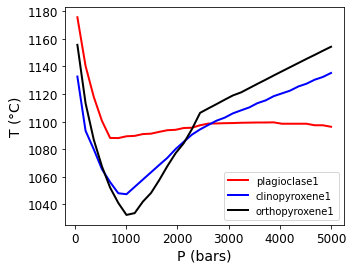

In [7]:
M.plot_surfaces(Results = Results, P_bar = P_bar, phases = phases)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


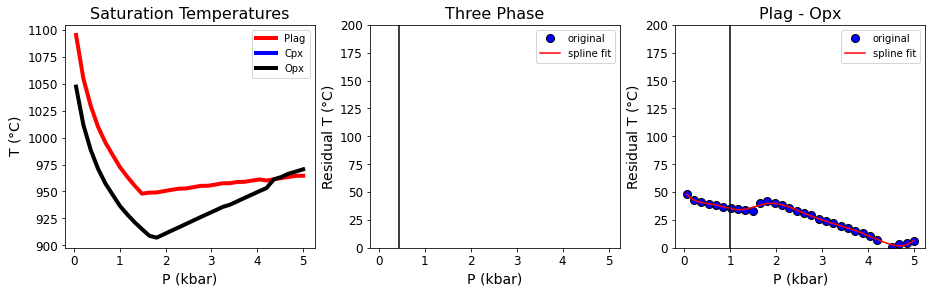

In [5]:
f, a = plt.subplots(1,3, figsize = (13,4), sharex = True)
f.tight_layout(pad = 2.0)

a[0].set_title('Saturation Temperatures')
a[0].set_xlabel('P (kbar)')
a[0].set_ylabel('T ($\degree$C)')
a[0].plot(P_bar/1000, Results['a_sat'][0,0,:], '-r', linewidth = 4, label = 'Plag')
a[0].plot(P_bar/1000, Results['b_sat'][0,0,:], '-b', linewidth = 4, label = 'Cpx')
a[0].plot(P_bar/1000, Results['c_sat'][0,0,:], '-k', linewidth = 4, label = 'Opx')
a[0].legend()

a[1].set_title('Three Phase')
a[1].set_xlabel('P (kbar)')
a[1].set_ylabel('Residual T ($\degree$C)')
a[1].plot(P_bar/1000, Results['Res_abc'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[1].plot(Results['CurveMin']['Res_abc']['P_new']/1000, Results['CurveMin']['Res_abc']['y_new'],
            '-', c="r", label="spline fit")
a[1].legend()
a[1].plot([0.44,0.44],[0,200], '-k')
a[1].set_ylim([0,200])

a[2].set_title('Plag - Opx')
a[2].set_xlabel('P (kbar)')
a[2].set_ylabel('Residual T ($\degree$C)')
a[2].plot(P_bar/1000, Results['Res_ac'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[2].plot(Results['CurveMin']['Res_ac']['P_new']/1000, Results['CurveMin']['Res_ac']['y_new'],
            '-', c="r", label="spline fit")
a[2].legend()
a[2].plot([1,1],[0,200], '-k')
a[2].set_ylim([0,200])
plt.savefig("P2P_figures/CpxOpxPlag_110_LEPR4799.eps", dpi = 300, bbox_inches='tight')

In [7]:
P_bar = np.linspace(50,5000,101)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = Comp.loc[35].to_dict(),
                                  Model = "MELTSv1.0.2",
                                  phases = phases,
                                  P_bar = P_bar,
                                  T_initial_C = 1000,
                                  dt_C = 200,
                                  T_step_C = 1,
                                  T_cut_C = 20,
                                  fO2_buffer = "NNO",
                                  find_min = True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


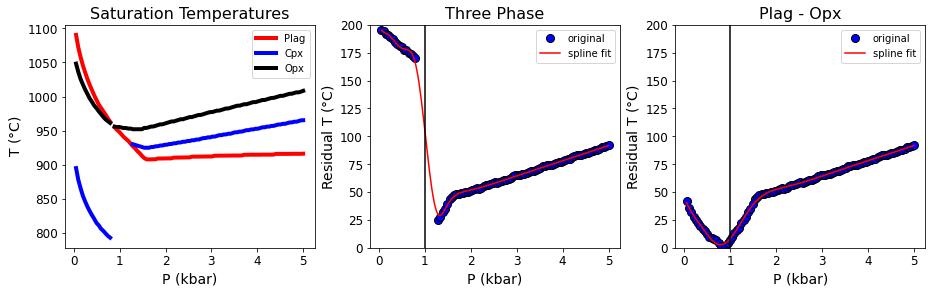

In [8]:
f, a = plt.subplots(1,3, figsize = (13,4), sharex = True)
f.tight_layout(pad = 2.0)

a[0].set_title('Saturation Temperatures')
a[0].set_xlabel('P (kbar)')
a[0].set_ylabel('T ($\degree$C)')
a[0].plot(P_bar/1000, Results['a_sat'][0,0,:], '-r', linewidth = 4, label = 'Plag')
a[0].plot(P_bar/1000, Results['b_sat'][0,0,:], '-b', linewidth = 4, label = 'Cpx')
a[0].plot(P_bar/1000, Results['c_sat'][0,0,:], '-k', linewidth = 4, label = 'Opx')
a[0].legend()

a[1].set_title('Three Phase')
a[1].set_xlabel('P (kbar)')
a[1].set_ylabel('Residual T ($\degree$C)')
a[1].plot(P_bar/1000, Results['Res_abc'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[1].plot(Results['CurveMin']['Res_abc']['P_new']/1000, Results['CurveMin']['Res_abc']['y_new'],
            '-', c="r", label="spline fit")
a[1].legend()
a[1].plot([1,1],[0,200], '-k')
a[1].set_ylim([0,200])

a[2].set_title('Plag - Opx')
a[2].set_xlabel('P (kbar)')
a[2].set_ylabel('Residual T ($\degree$C)')
a[2].plot(P_bar/1000, Results['Res_ac'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[2].plot(Results['CurveMin']['Res_ac']['P_new']/1000, Results['CurveMin']['Res_ac']['y_new'],
            '-', c="r", label="spline fit")
a[2].legend()
a[2].plot([1,1],[0,200], '-k')
a[2].set_ylim([0,200])
plt.savefig("P2P_figures/CpxOpxPlag_102_LEPR4799.eps", dpi = 300, bbox_inches='tight')

In [9]:
P_bar = np.linspace(50,5000,101)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']
Results = M.findSaturationPressure(comp = Comp.loc[35].to_dict(),
                                  Model = "MELTSv1.2.0",
                                  phases = phases,
                                  P_bar = P_bar,
                                  T_initial_C = 1000,
                                  dt_C = 200,
                                  T_step_C = 1,
                                  T_cut_C = 20,
                                  fO2_buffer = "NNO",
                                  find_min = True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


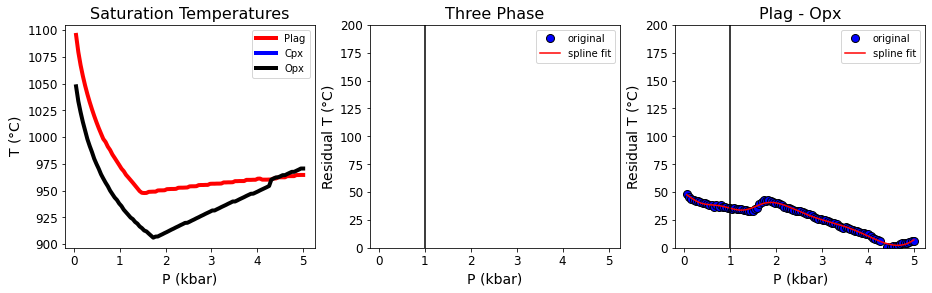

In [10]:
f, a = plt.subplots(1,3, figsize = (13,4), sharex = True)
f.tight_layout(pad = 2.0)

a[0].set_title('Saturation Temperatures')
a[0].set_xlabel('P (kbar)')
a[0].set_ylabel('T ($\degree$C)')
a[0].plot(P_bar/1000, Results['a_sat'][0,0,:], '-r', linewidth = 4, label = 'Plag')
a[0].plot(P_bar/1000, Results['b_sat'][0,0,:], '-b', linewidth = 4, label = 'Cpx')
a[0].plot(P_bar/1000, Results['c_sat'][0,0,:], '-k', linewidth = 4, label = 'Opx')
a[0].legend()

a[1].set_title('Three Phase')
a[1].set_xlabel('P (kbar)')
a[1].set_ylabel('Residual T ($\degree$C)')
a[1].plot(P_bar/1000, Results['Res_abc'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[1].plot(Results['CurveMin']['Res_abc']['P_new']/1000, Results['CurveMin']['Res_abc']['y_new'],
            '-', c="r", label="spline fit")
a[1].legend()
a[1].plot([1,1],[0,200], '-k')
a[1].set_ylim([0,200])

a[2].set_title('Plag - Opx')
a[2].set_xlabel('P (kbar)')
a[2].set_ylabel('Residual T ($\degree$C)')
a[2].plot(P_bar/1000, Results['Res_ac'][0,0,:], 'ok', markerfacecolor="b", label="original", markersize = 8)
a[2].plot(Results['CurveMin']['Res_ac']['P_new']/1000, Results['CurveMin']['Res_ac']['y_new'],
            '-', c="r", label="spline fit")
a[2].legend()
a[2].plot([1,1],[0,200], '-k')
a[2].set_ylim([0,200])
plt.savefig("P2P_figures/CpxOpxPlag_120_LEPR4799.eps", dpi = 300, bbox_inches='tight')

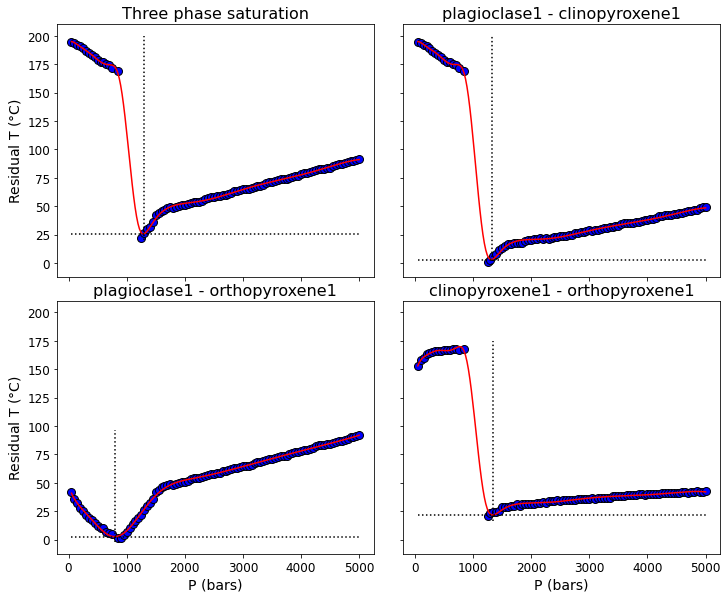

In [13]:
M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases)

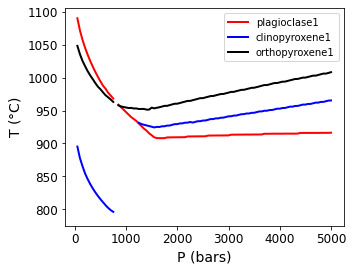

In [14]:
M.plot_surfaces(Results = Results, P_bar = P_bar, phases = phases)

In [8]:
P_bar = np.linspace(500, 7500, 20)
H2O_Liq = np.linspace(0.2, 6, 8)
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']

Presults = {}
%matplotlib

#for i in tqdm(range(32,len(Comp['SiO2_Liq']))):
i = 1
# try:
Results = M.findSaturationPressure(comp = Comp.loc[i].to_dict(), 
                                   Model = "MELTSv1.2.0", 
                                   phases = phases,
                                   P_bar = P_bar, 
                                   T_initial_C = 1100,
                                   dt_C = 75, 
                                   T_step_C = 1, 
                                   T_cut_C = 12,
                                   H2O_Liq = H2O_Liq,
                                   find_range = True,
                                   find_min = True,
                                  fO2_buffer = "FMQ",
                                  fO2_offset = -1)

Res = Results.copy()
ResMin = np.nanmin(Res['Res_abc'])
Start = Comp.loc[i].to_dict()
Res['P'] = Res['H2O_melt'].copy()
for k in range(len(Res['P'][:,0,0])):
    Res['P'][k,0,:] = P_bar

Pmin = Res['P'][np.where(Res['Res_abc'] == ResMin)]
H2Omin = Res['H2O_melt'][np.where(Res['Res_abc'] == ResMin)]

Results['Minimum'] = {'Res': ResMin, 'P': Pmin, 'H2O': H2Omin}

f, a = plt.subplots(1, 2, figsize = (9,4), sharex = True, sharey = True)
a[0].plot(Res['P'][Res['range'] == True]/1000, 
          Res['H2O_melt'][Res['range']== True], 'ok', markerfacecolor = [0.8,0.8,0.8])
a[0].plot([Start['P_kbar_true'], Start['P_kbar_true']],
          [np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))]),
               np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])], '--k')
a[0].plot([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
               np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000],
          [Start['H2O_Liq'], Start['H2O_Liq']],'--k')
a[0].plot(Start['P_kbar_true'], Start['H2O_Liq'], '*k', markerfacecolor = 'yellow', markersize = 10)
a[0].plot(Pmin/1000, H2Omin, 'dk', markerfacecolor = 'red', markersize = 10)

Res['H2O_melt'][np.where(np.isnan(Res['H2O_melt']))] = 0.0
a[1].contourf(Res['P'][:,0,:]/1000, Res['H2O_melt'][:,0,:], 
             Res['Res_abc'][:,0,:], 20)
a[1].contour(Res['P'][:,0,:]/1000, Res['H2O_melt'][:,0,:], 
             Res['Res_abc'][:,0,:], [8, 12], colors = ['red', 'white'])
a[1].plot([Start['P_kbar_true'], Start['P_kbar_true']],
          [np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))]),
               np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])], '--k')
a[1].plot([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
               np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000],
          [Start['H2O_Liq'], Start['H2O_Liq']],'--k')
a[1].plot(Start['P_kbar_true'], Start['H2O_Liq'], '*k', markerfacecolor = 'yellow', markersize = 10)

a[1].set_xlim([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
               np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000])
a[1].set_ylim([np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])-0.1,
               np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])])

a[0].set_ylabel('H$_{2}$O (wt%)')
a[0].set_xlabel('P (kbar)')
a[1].set_xlabel('P (kbar)')

f.suptitle('Sample ' + str(i))

with open('LowPResults/Sample_' + str(i) + '.obj', 'wb') as f:
    pickle.dump(Results,f)

plt.savefig("LowPResults/Sample_" + str(i) + ".pdf", dpi = 300, bbox_inches='tight')

Presults[str(i)] = Results

# except:
#     pass

Using matplotlib backend: Qt5Agg


In [10]:
Results

{'a_sat': array([[[1198.4, 1201. , 1203.6, 1206. , 1208.4, 1210.6, 1212.8, 1216.4,
          1220.4, 1223.3, 1227.1, 1229.8, 1232.5, 1236. , 1238.5, 1241.9,
          1245.3, 1247.6, 1249.8, 1251.9]],
 
        [[1152.8, 1155.3, 1157.6, 1159.9, 1162. , 1165.7, 1168.9, 1171.9,
          1175.9, 1178.8, 1181.6, 1184.3, 1187. , 1188.5, 1191. , 1192.4,
          1192.8, 1194. , 1194.2, 1194.4]],
 
        [[1116.9, 1119.5, 1121.1, 1123.7, 1126.2, 1128.3, 1131.4, 1134.5,
          1137.4, 1140.3, 1143.1, 1141.8, 1143.4, 1143.9, 1143.4, 1142.8,
          1143.1,    nan,    nan,    nan]],
 
        [[   nan, 1090.4, 1092. , 1094.5, 1096. , 1098.5, 1100. , 1102.2,
          1105.1, 1104. , 1103.7, 1103.4, 1102.9, 1101.4, 1099.8,    nan,
             nan,    nan,    nan,    nan]],
 
        [[   nan,    nan, 1066.8, 1069.3, 1070.8, 1072.3, 1073.7, 1076.2,
          1071.6, 1071.2, 1070.9, 1069.5, 1068. ,    nan,    nan,    nan,
             nan,    nan,    nan,    nan]],
 
        [[   nan,    

In [9]:
M.residualT_plot(Results = Results, P_bar = P_bar, H2O_Liq = H2O_Liq, phases = phases)

  0%|          | 0/38 [00:00<?, ?it/s]

g:\my drive\2022\github\pymeltscalc\src\pyMELTScalc\Plotting.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, a = plt.subplots(2,2, figsize = (10,8), sharex = True, sharey = True)


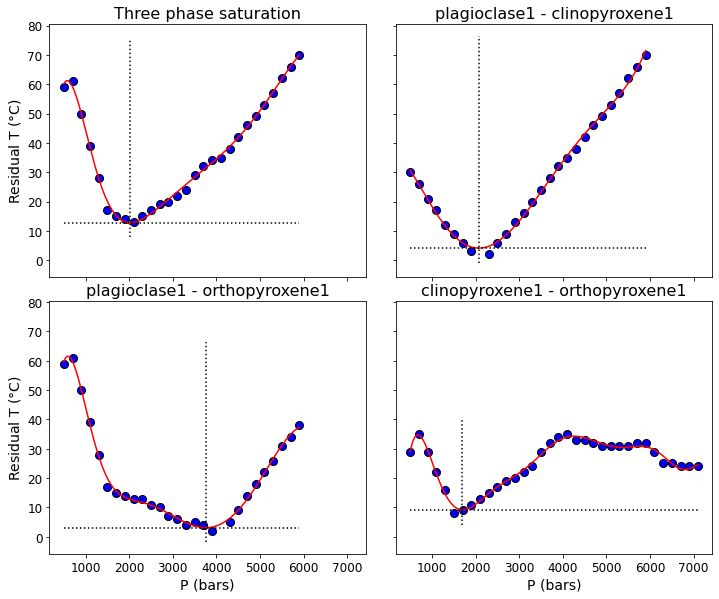

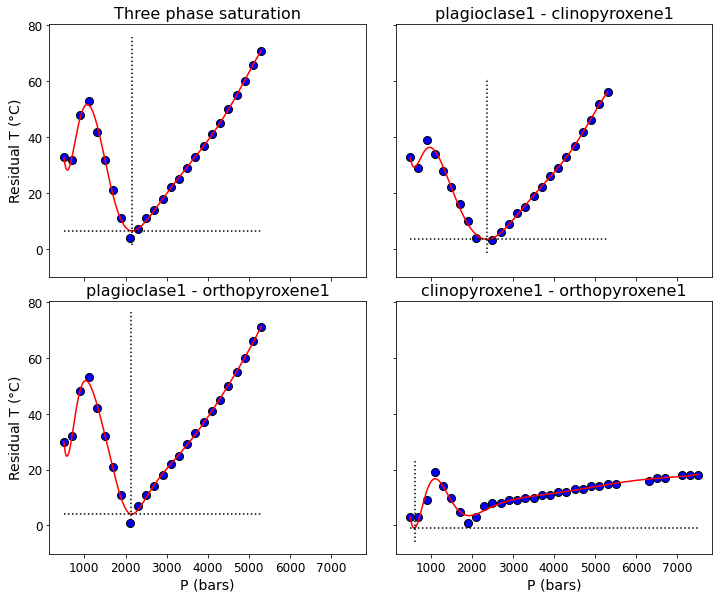

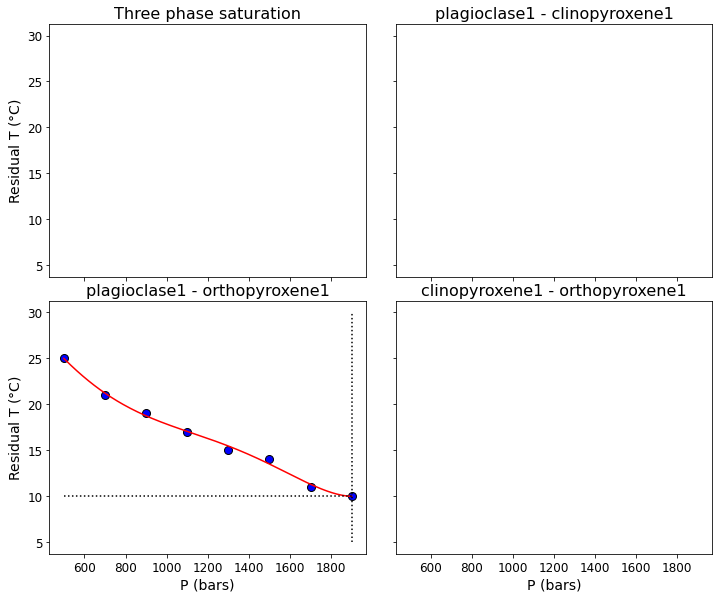

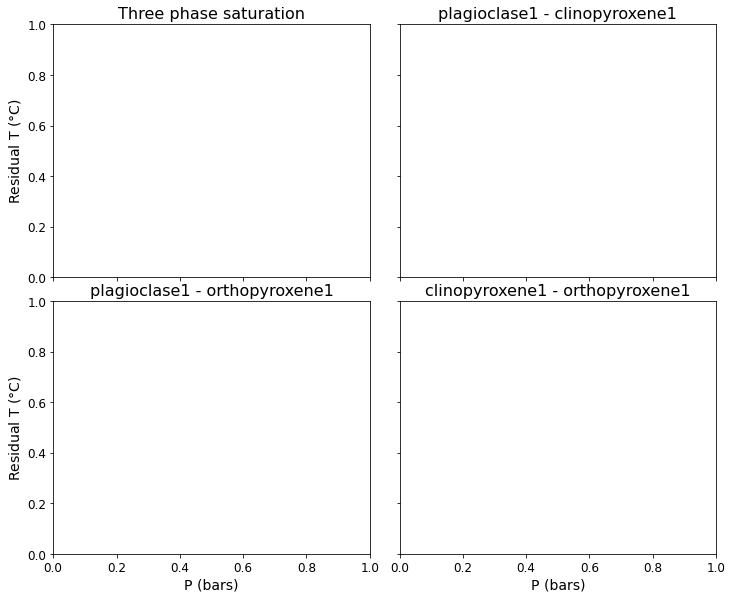

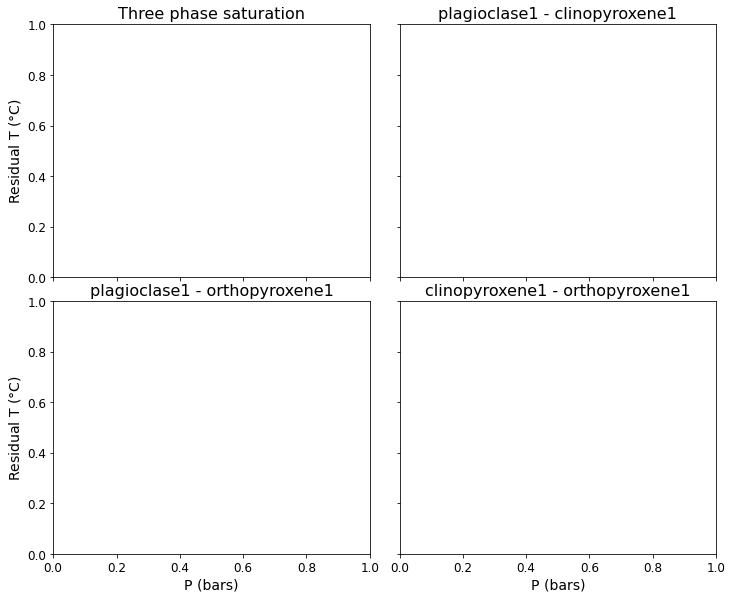

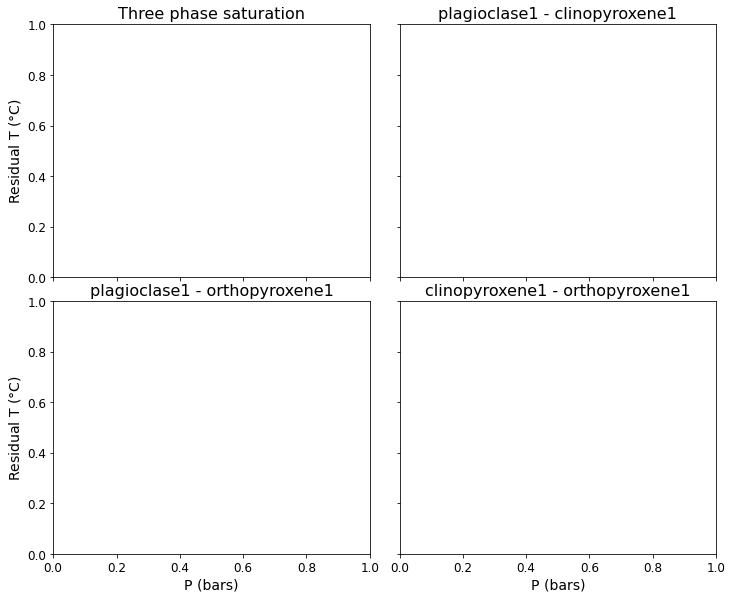

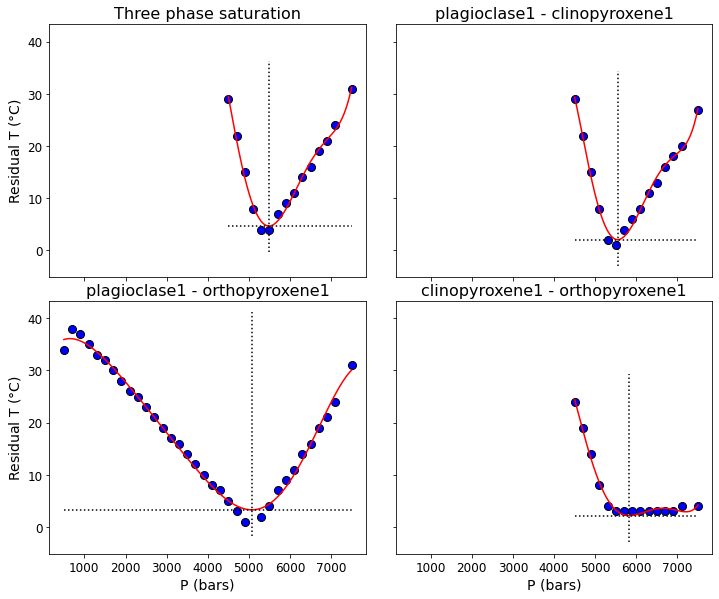

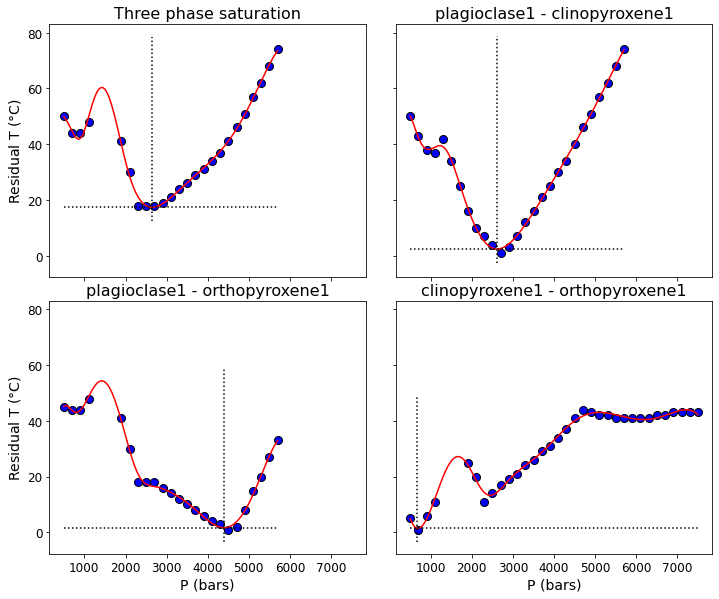

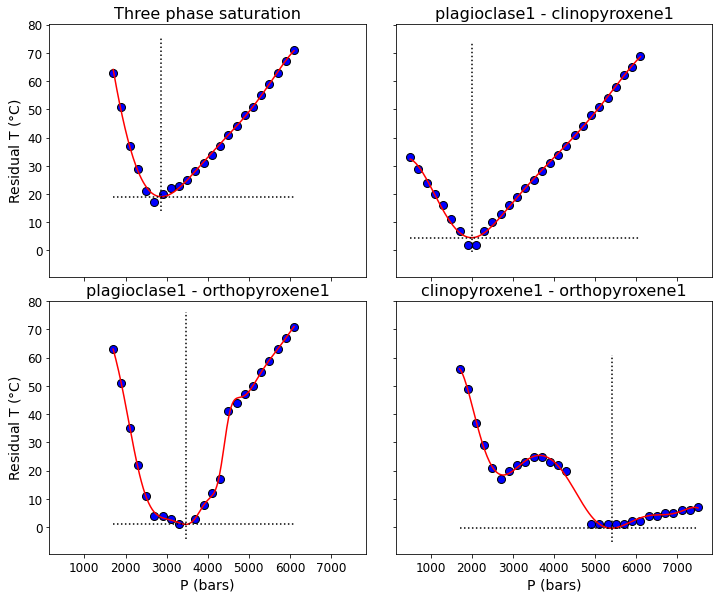

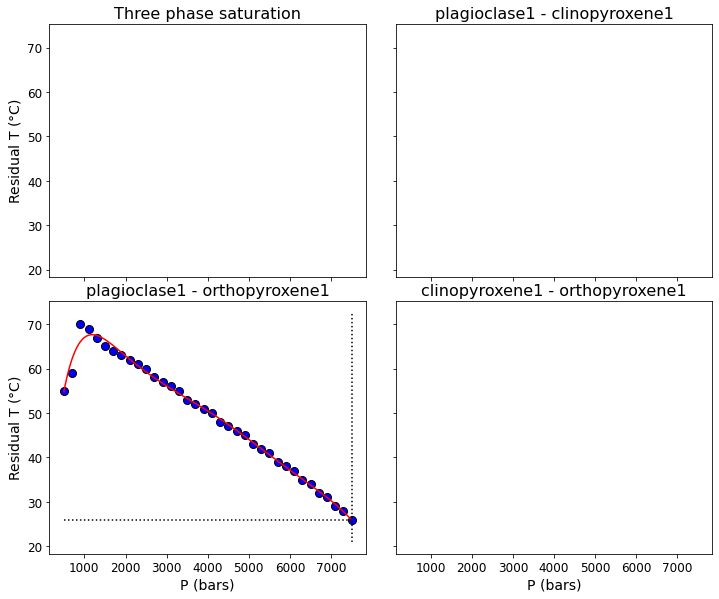

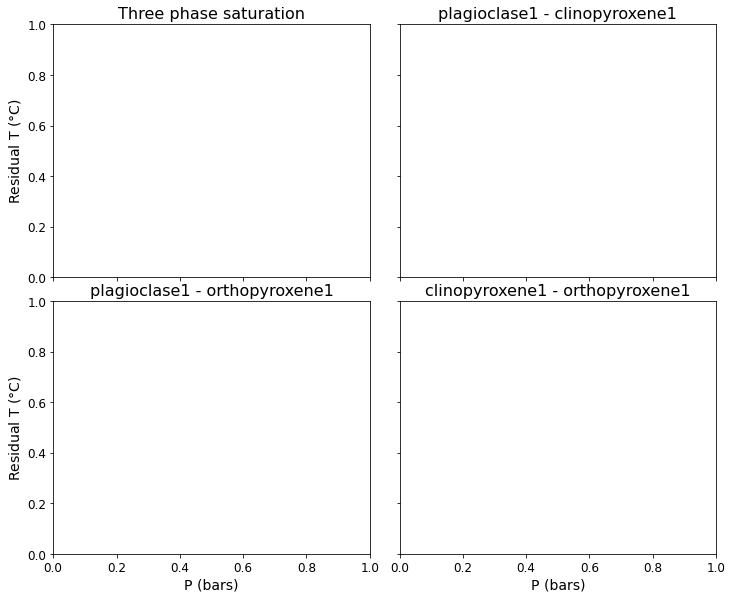

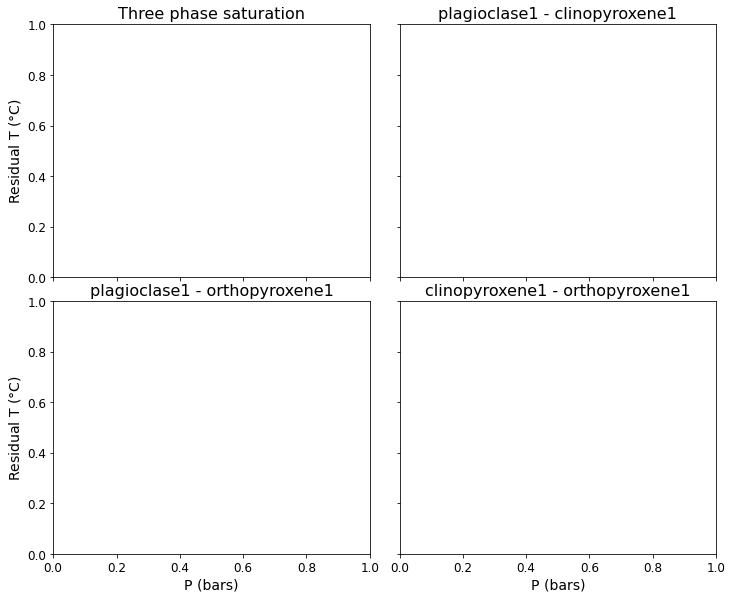

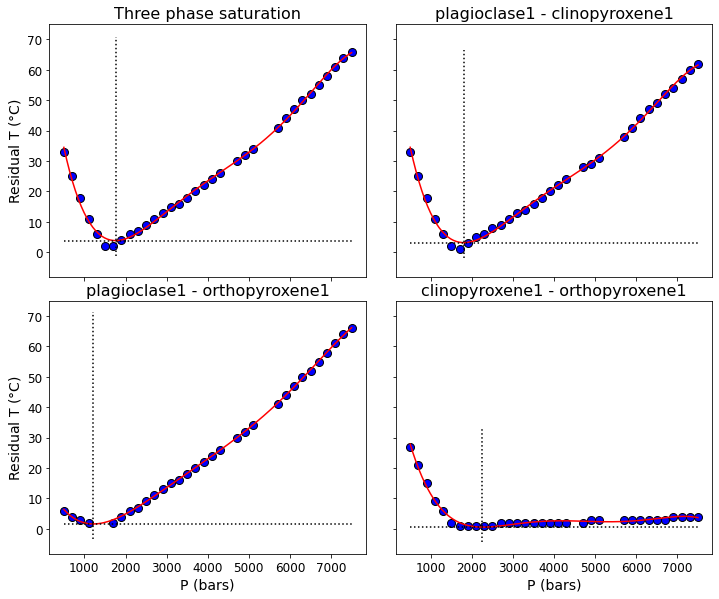

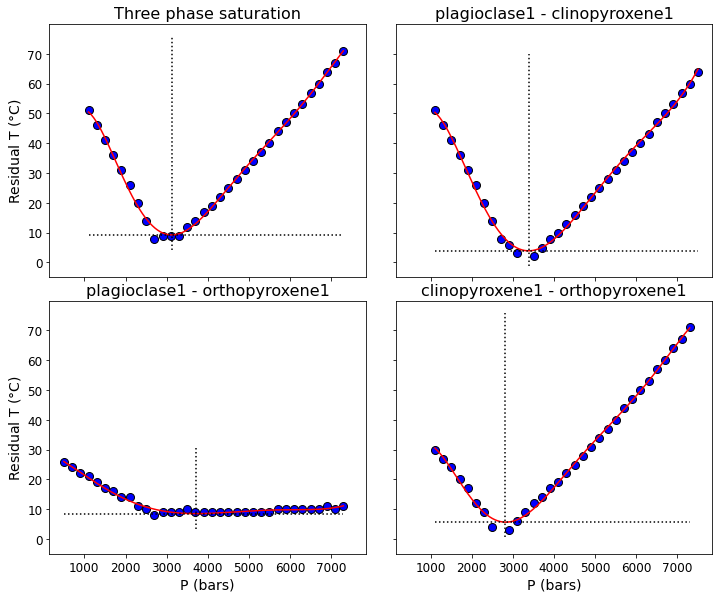

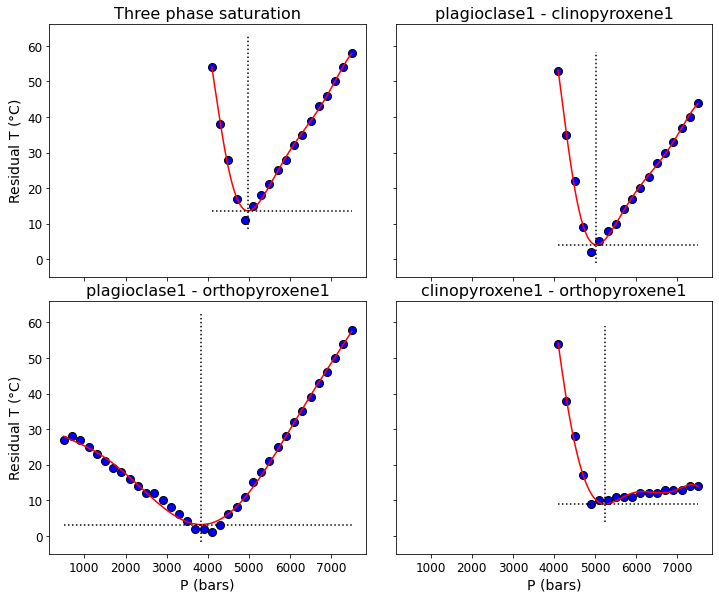

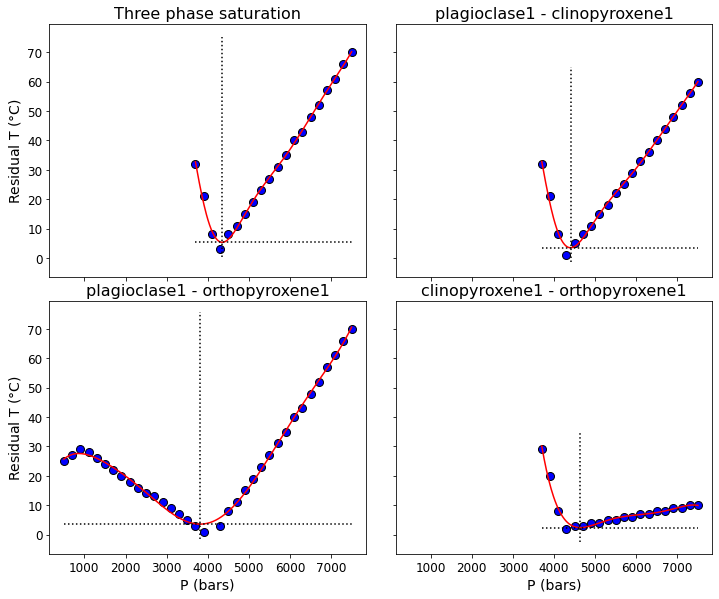

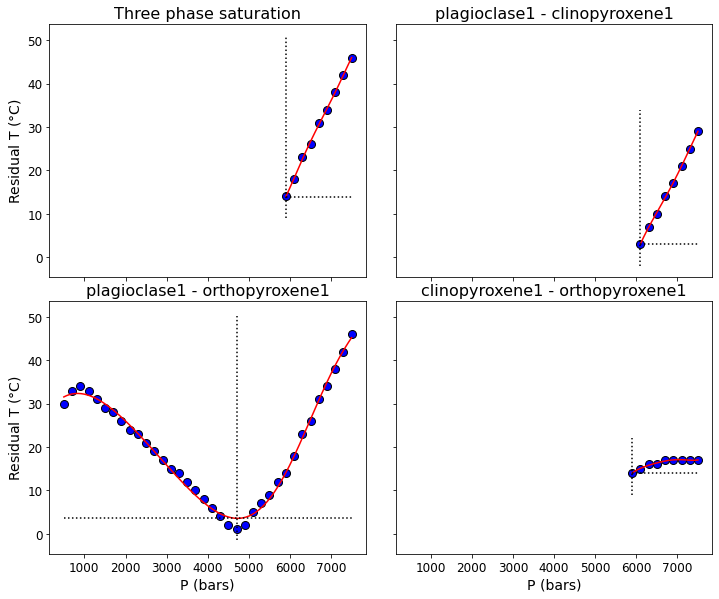

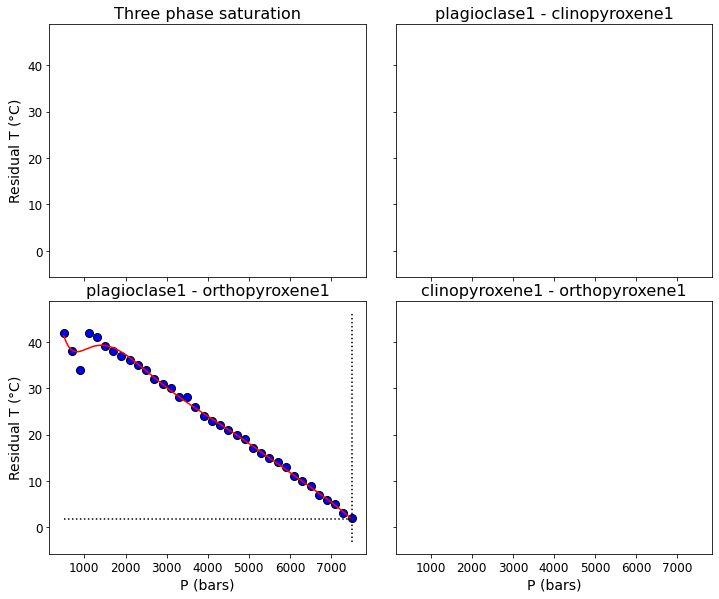

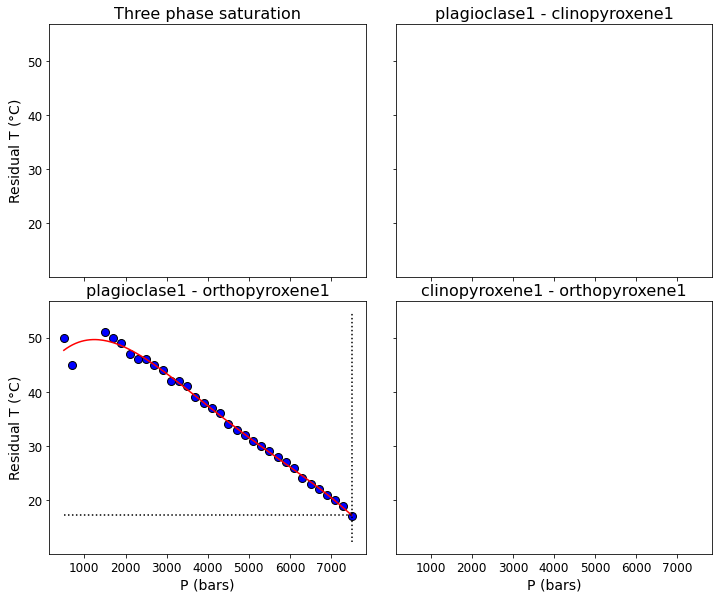

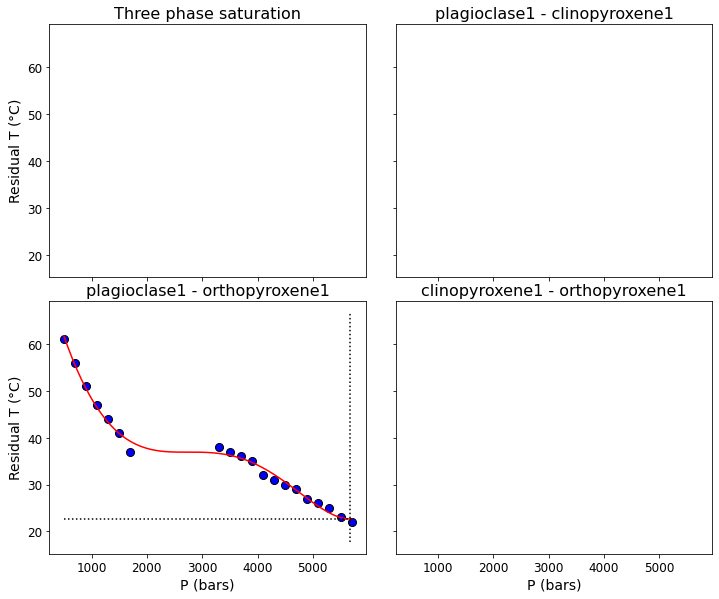

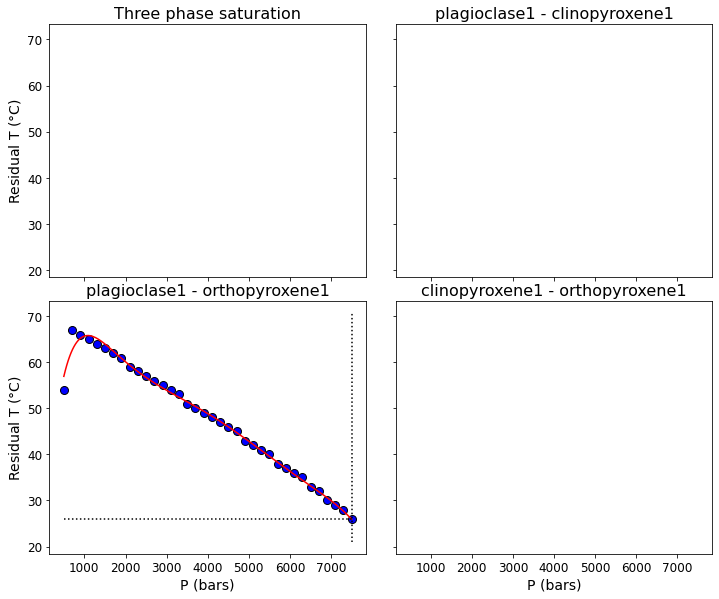

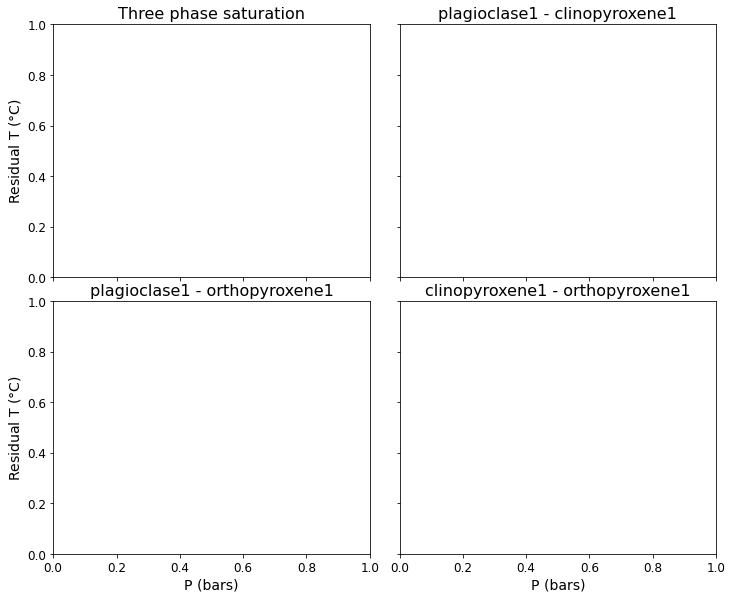

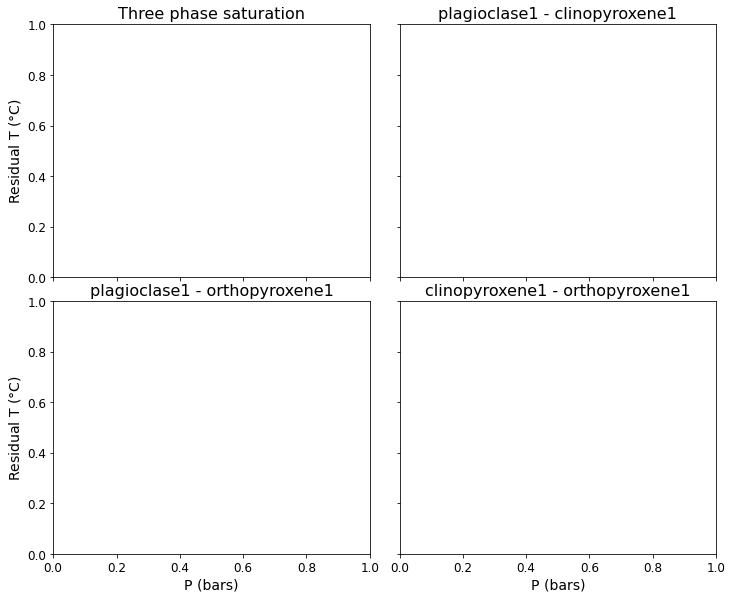

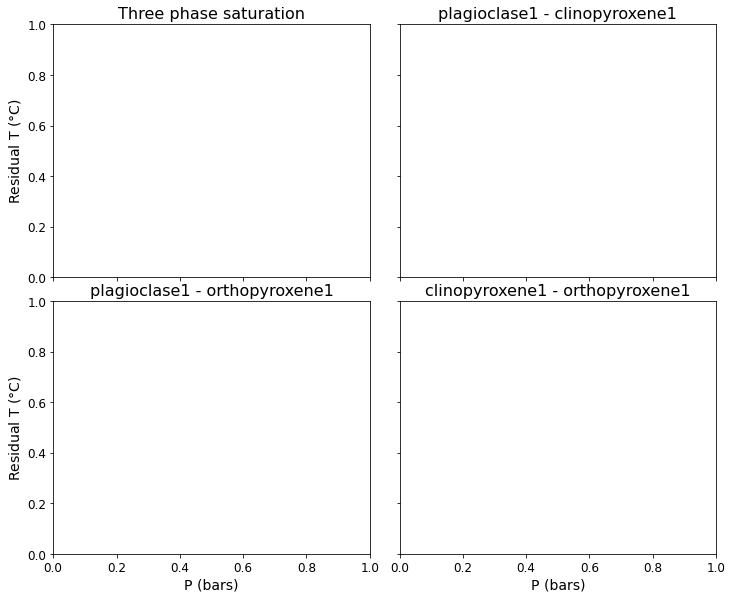

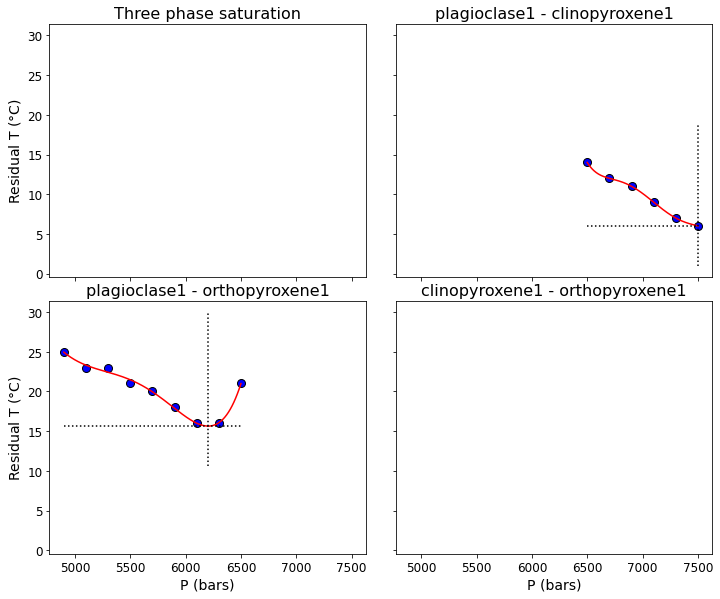

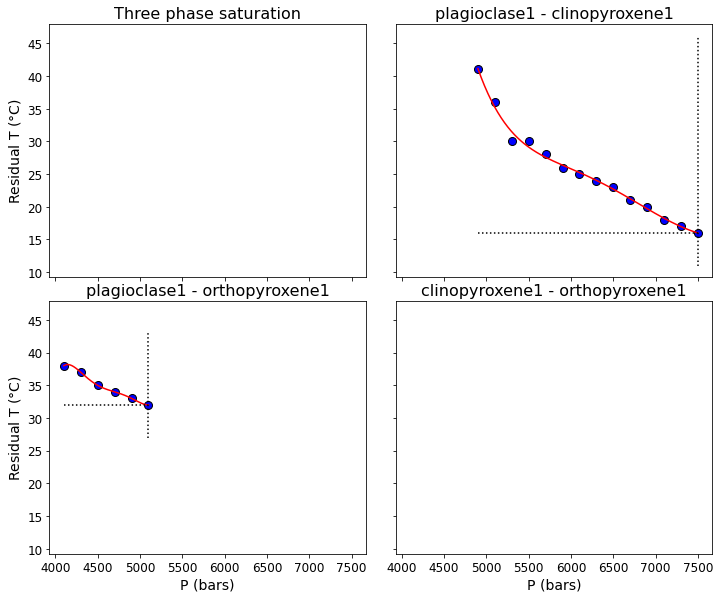

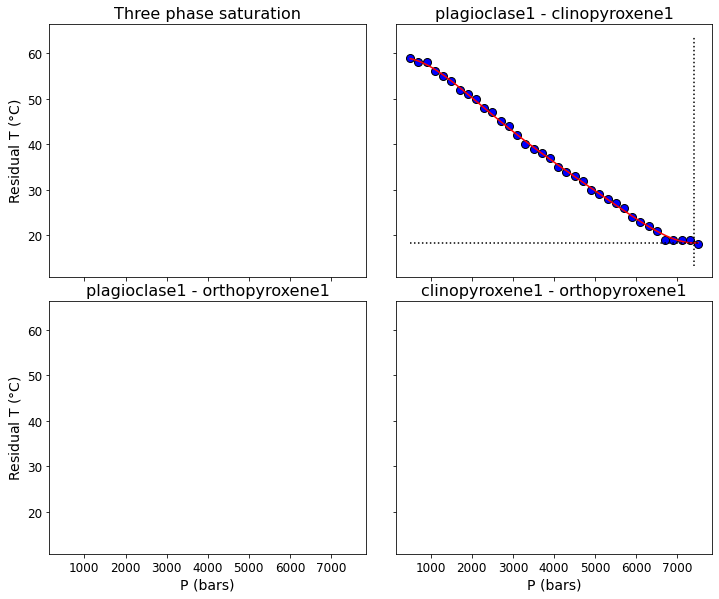

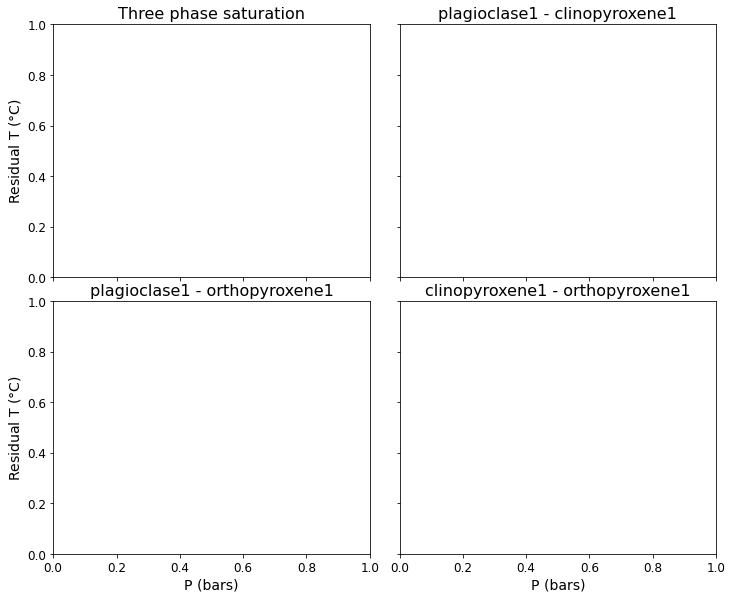

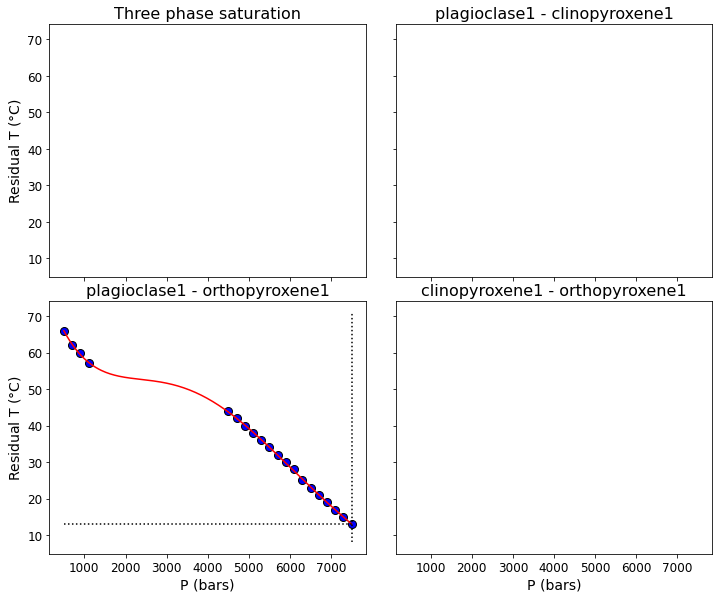

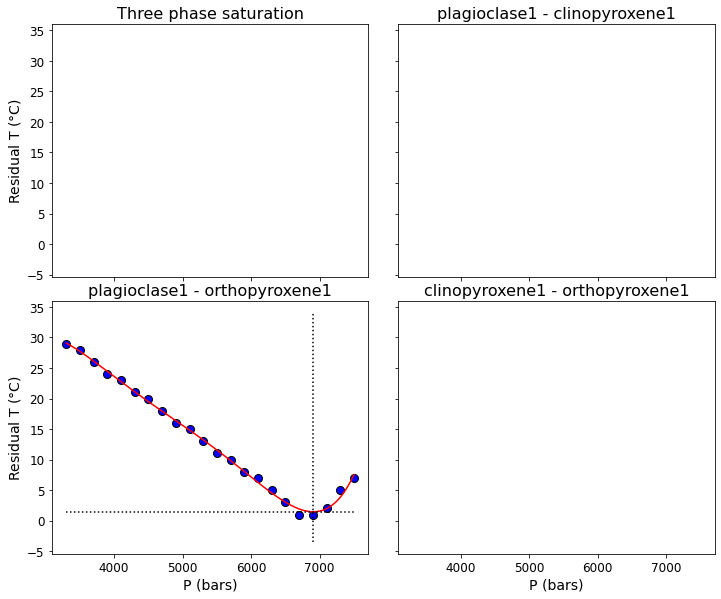

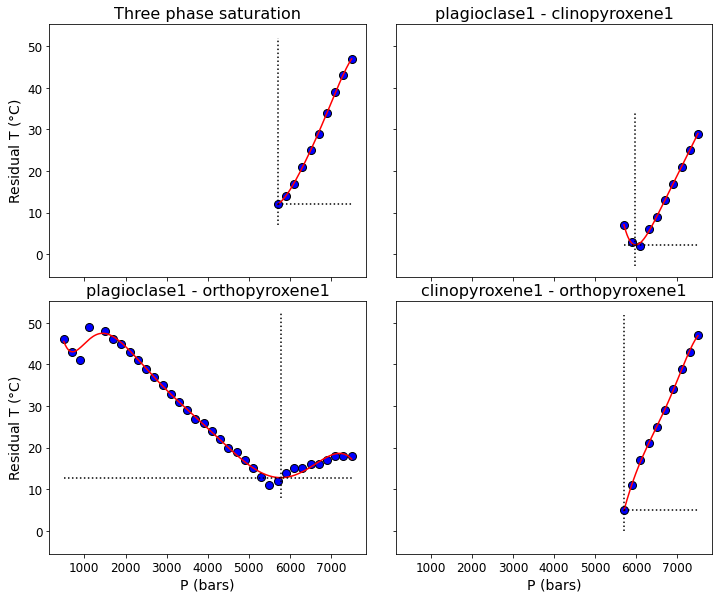

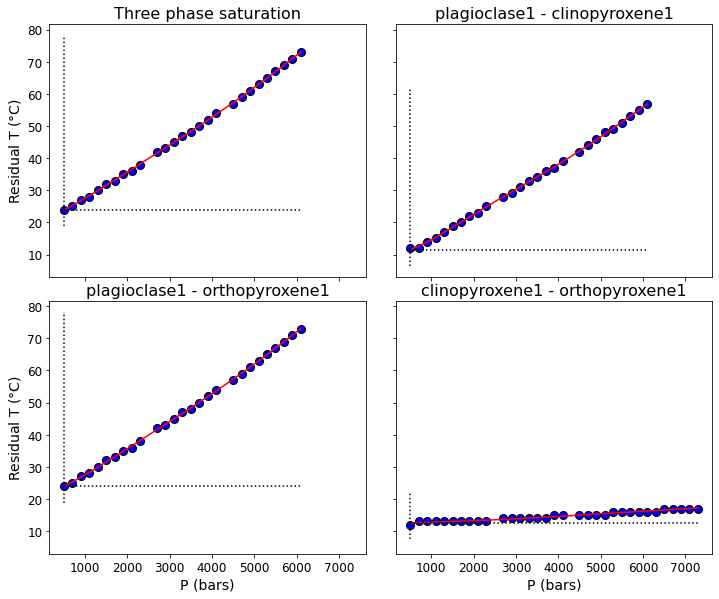

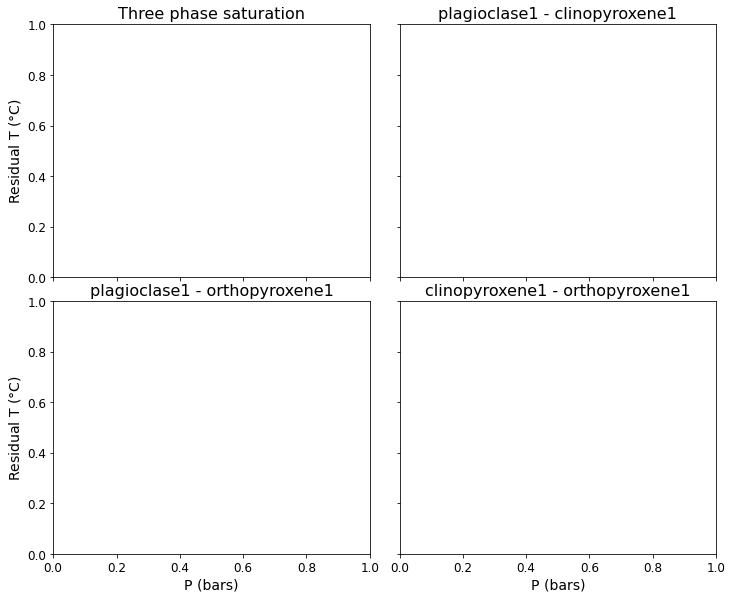

In [4]:
P_bar = np.linspace(500, 7500, 36)
#Comp['H2O_Liq'] = np.zeros(len(Comp['SiO2_Liq'])) + 10
phases = ['plagioclase1', 'clinopyroxene1', 'orthopyroxene1']

Presults = {}
#%matplotlib

for i in tqdm(range(len(Comp['SiO2_Liq']))):
    try:
        Results = M.findSaturationPressure(comp = Comp.loc[i].to_dict(), 
                                           Model = "MELTSv1.2.0", 
                                           cores = 18,
                                           phases = phases,
                                           P_bar = P_bar, 
                                           T_initial_C = 1100,
                                           dt_C = 75, 
                                           T_step_C = 1, 
                                           T_cut_C = 12,
                                          find_min = True)
        
        M.residualT_plot(Results = Results, P_bar = P_bar, phases = phases)

#         Res = Results.copy()
#         ResMin = np.nanmin(Res['Res_abc'])
#         Start = Comp.loc[i].to_dict()
#         Res['P'] = Res['H2O_melt'].copy()
#         for k in range(len(Res['P'][:,0,0])):
#             Res['P'][k,0,:] = P_bar

#         Pmin = Res['P'][np.where(Res['Res_abc'] == ResMin)]
#         H2Omin = Res['H2O_melt'][np.where(Res['Res_abc'] == ResMin)]

#         Results['Minimum'] = {'Res': ResMin, 'P': Pmin, 'H2O': H2Omin}

#         f, a = plt.subplots(1, 2, figsize = (9,4), sharex = True, sharey = True)
#         a[0].plot(Res['P'][Res['range'] == True]/1000, 
#                   Res['H2O_melt'][Res['range']== True], 'ok', markerfacecolor = [0.8,0.8,0.8])
#         a[0].plot([Start['P_kbar_true'], Start['P_kbar_true']],
#                   [np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))]),
#                        np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])], '--k')
#         a[0].plot([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
#                        np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000],
#                   [Start['H2O_Liq'], Start['H2O_Liq']],'--k')
#         a[0].plot(Start['P_kbar_true'], Start['H2O_Liq'], '*k', markerfacecolor = 'yellow', markersize = 10)
#         a[0].plot(Pmin/1000, H2Omin, 'dk', markerfacecolor = 'red', markersize = 10)

#         Res['H2O_melt'][np.where(np.isnan(Res['H2O_melt']))] = 0.0
#         a[1].contourf(Res['P'][:,0,:]/1000, Res['H2O_melt'][:,0,:], 
#                      Res['Res_abc'][:,0,:], 20)
#         a[1].contour(Res['P'][:,0,:]/1000, Res['H2O_melt'][:,0,:], 
#                      Res['Res_abc'][:,0,:], [8, 12], colors = ['red', 'white'])
#         a[1].plot([Start['P_kbar_true'], Start['P_kbar_true']],
#                   [np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))]),
#                        np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])], '--k')
#         a[1].plot([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
#                        np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000],
#                   [Start['H2O_Liq'], Start['H2O_Liq']],'--k')
#         a[1].plot(Start['P_kbar_true'], Start['H2O_Liq'], '*k', markerfacecolor = 'yellow', markersize = 10)

#         a[1].set_xlim([np.nanmin(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000,
#                        np.nanmax(Res['P'][np.where(~np.isnan(Res['Res_abc']))])/1000])
#         a[1].set_ylim([np.nanmin(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])-0.1,
#                        np.nanmax(Res['H2O_melt'][np.where(~np.isnan(Res['Res_abc']))])])

#         a[0].set_ylabel('H$_{2}$O (wt%)')
#         a[0].set_xlabel('P (kbar)')
#         a[1].set_xlabel('P (kbar)')

#         f.suptitle('Sample ' + str(i))

        with open('LowPResults/H2O_true_Sample_' + str(i) + '.obj', 'wb') as f:
            pickle.dump(Results,f)

        plt.savefig("LowPResults/H2O_true_Sample_" + str(i) + ".pdf", dpi = 300, bbox_inches='tight')

        Presults[str(i)] = Results
    
    except:
        pass

In [7]:
Comp['P_kbar_calc'] = np.zeros(len(Comp['SiO2_Liq']))*np.nan
for i in range(len(Comp['SiO2_Liq'])):
    try:
        Comp['P_kbar_calc'].loc[i] = Presults[str(i)]['CurveMin']['Res_abc']['P_min']
    except:
        pass

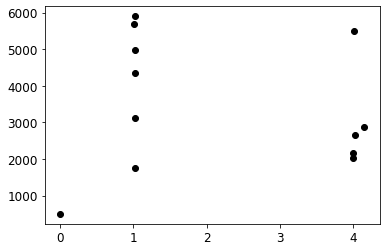

In [8]:
f, a = plt.subplots(1,1)
a.plot(Comp['P_kbar_true'], Comp['P_kbar_calc'], 'ok')

In [6]:
Presults

{'1': {'a_sat': array([[[1103.3, 1087. , 1073.4, 1061.8, 1052.1, 1042.6, 1033.3, 1021.9,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan]]]),
  'b_sat': array([[[1070.3, 1058. , 1049.4, 1041.8, 1036.1, 1031.6, 1028.3, 1027.9,
           1025.2, 1022.5, 1019.7, 1019.7,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan]]]),
  'c_sat': array([[[1073.3, 1055. , 1040.4, 1029.8, 1020.1, 1012.6, 1007.3,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
              nan,    nan,    nan,    nan,    nan

In [18]:
Outputs = list(Presults.keys())
Res = pd.DataFrame(data = np.zeros((47,2)), columns = ['P_results', 'H2O_results'])

for o in Outputs:
    Res['P_results'].loc[int(o)] = Presults[o]['CurveMin']['Res_abc']['P_min']
    Res['H2O_results'].loc[int(o)] = Presults[o]['CurveMin']['Res_abc']['H2O_min']

Res['P_results'][Res['P_results'] == 0.0] = np.nan
Res['H2O_results'][Res['H2O_results'] == 0.0] = np.nan

Text(0, 0.5, 'Calculated H$_{2}$O (wt%)')

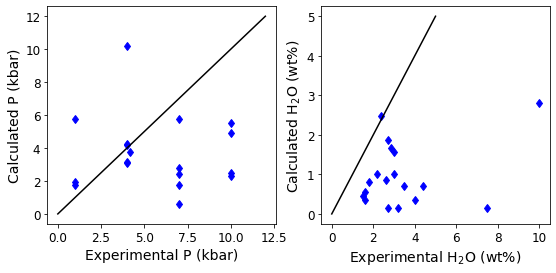

In [26]:
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

f, a = plt.subplots(1,2, figsize = (9,4))
a[0].plot(Data['P_kbar'], Res['P_results']/1000, 'db')
a[0].plot([0,12], [0,12], '-k')
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')

a[1].plot(Data['H2O_Liq'], Res['H2O_results'], 'db')
a[1].plot([0,5],[0,5], '-k')
a[1].set_xlabel('Experimental H$_{2}$O (wt%)')
a[1].set_ylabel('Calculated H$_{2}$O (wt%)')

In [30]:
import pickle
with open('Presults_Lydia47.obj', 'wb') as f:
    pickle.dump(Presults,f)

OSError: [Errno 22] Invalid argument: 'Presults_Lydia47.obj'